In [2]:
print("hello")

hello


In [3]:
import numpy as np

# x = np.array([[1,2,3], [4,5,6]], np.int32)
x = np.ones((3,3,3), dtype=int)
x.shape
x

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]])

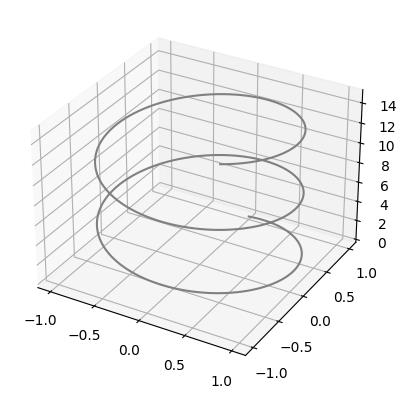

In [4]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')



# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

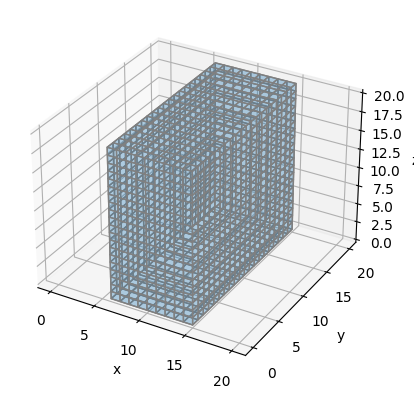

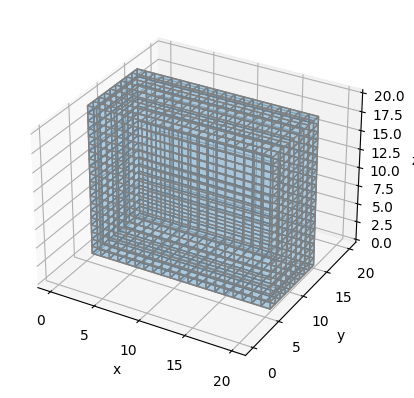

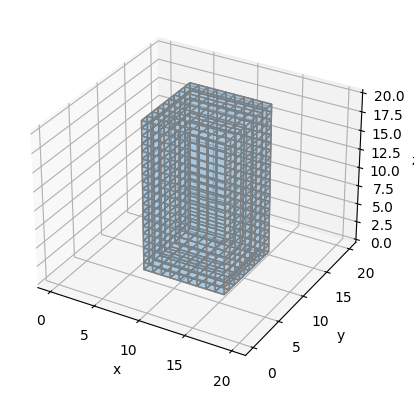

In [5]:
def make_ax(grid=False):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.grid(grid)
    return ax

def show(matrix):
    ax = make_ax(True)
    ax.voxels(matrix, facecolors='#1f77b430', edgecolors='gray', shade=False)
    plt.show()

length = 20
width = 20
height = 20
matrix1 = np.zeros((length, width, height), dtype=int)
matrix2 = np.zeros((length, width, height), dtype=int)

for x in range(length):
    for y in range(width):
        for z in range(height):
            if( 5 < x and x < 15):
                matrix1[x][y][z] = 1
for x in range(length):
    for y in range(width):
        for z in range(height):
            if( 5 < y and y < 15):
                matrix2[x][y][z] = 1


    # print("nanasnkalknd")
# print(filled)

# filled = np.array([
#     [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
#     [[1, 0, 0], [0, 0, 0], [0, 0, 0]],
#     [[0, 1, 0], [1, 1, 1], [0, 0, 0]]
# ])

show(matrix1)
show(matrix2)

matrix3 = matrix2 * matrix1
show(matrix3)

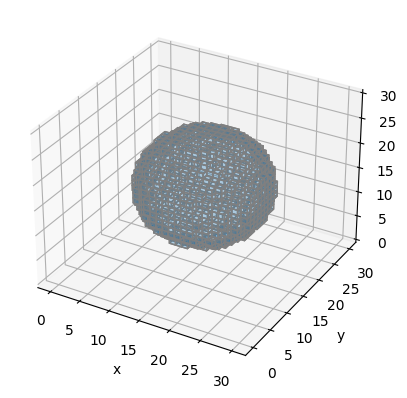

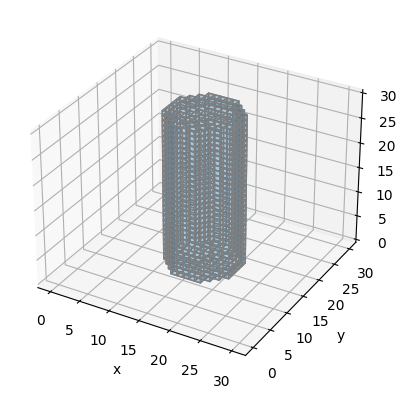

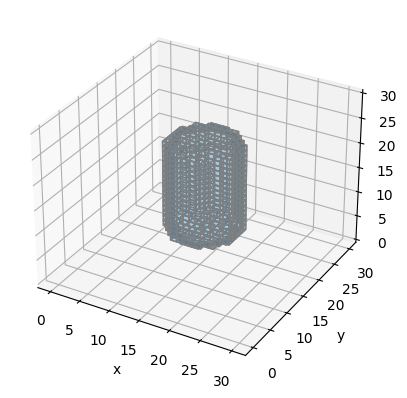

In [6]:
# circle and cylinder
size = 30
matrix1 = np.zeros((size, size, size), dtype=int)
matrix2 = np.zeros((size, size, size), dtype=int)

for x in range(size):
    for y in range(size):
        for z in range(size):
            if((x - size/2)**2 + (y - size/2)**2 + (z - size/2)**2 < 100):
                matrix1[x][y][z] = 1
for x in range(size):
    for y in range(size):
        for z in range(size):
            if((x - size/2)**2 + (y - size/2)**2 < 30):
                matrix2[x][y][z] = 1

show(matrix1)
show(matrix2)

matrix3 = matrix2 * matrix1
show(matrix3)

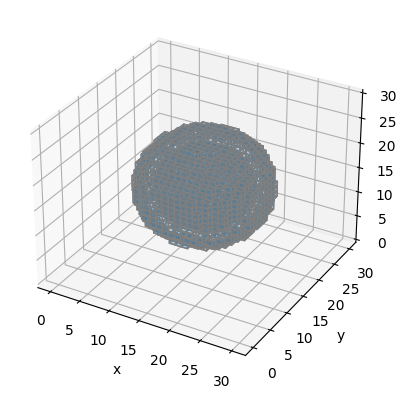

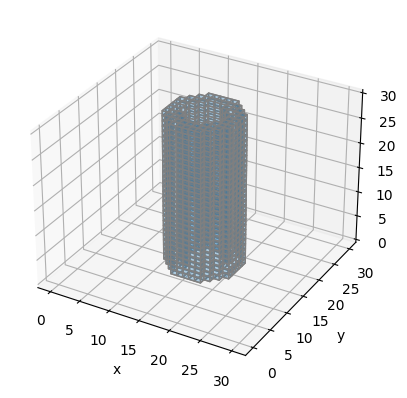

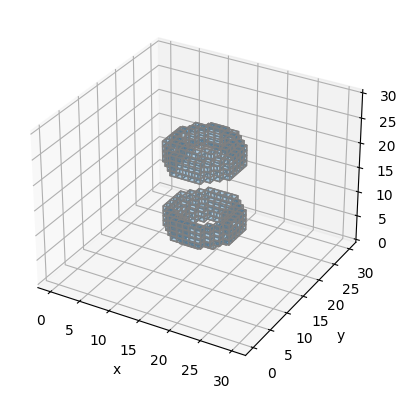

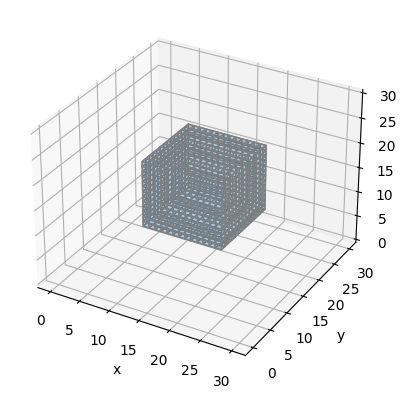

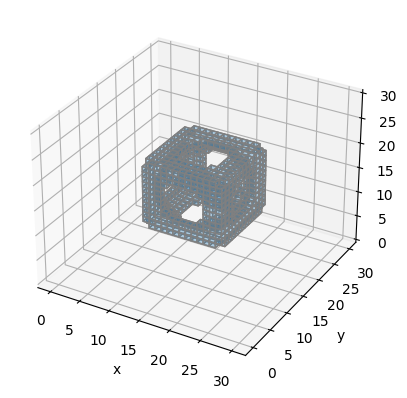

In [7]:
# hollow stuff

def make_ax(grid=False):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.grid(grid)
    return ax
def makeSphere(matrix, radius, innerRadius = 0):
    for x in range(size):
        for y in range(size):
            for z in range(size):
                if(innerRadius**2 < (x - size/2)**2 + (y - size/2)**2 + (z - size/2)**2 < radius**2):
                    matrix[x][y][z] = 1

size = 30
hollowsphere = np.zeros((size, size, size), dtype=int)
matrix2 = np.zeros((size, size, size), dtype=int)
cube = np.zeros((size, size, size), dtype=int)

makeSphere(hollowsphere, 10, 7)

for x in range(size):
    for y in range(size):
        for z in range(size):
            if(10 < (x - size/2)**2 + (y - size/2)**2 < 30):
                matrix2[x][y][z] = 1
for x in range(size):
    for y in range(size):
        for z in range(size):
            if((x - size/2)**2 < 40 and (y - size/2)**2 < 40 and (z - size/2)**2 < 40):
                cube[x][y][z] = 1


show(hollowsphere)
show(matrix2)

matrix3 = matrix2 * hollowsphere
show(matrix3)

show(cube)
show(cube*hollowsphere)

In [8]:
#Try sparse matrix optimization with Scipy
# sparse matrix using csr_matrix()
#time the matrix multiplication with time
import collections.abc
#hyper needs the four following aliases to be done manually.
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping
import sparse
import time
  
# x = sparse.COO(coords, data, shape=((n,) * ndims))
sparsecube = sparse.COO(cube)
sparseHollowSphere = sparse.COO(hollowsphere)

start = time.time()
result = cube*hollowsphere
print("unoptimized matrix multiplication took " + str(time.time() - start) + " seconds.")
start = time.time()
result = sparsecube*sparseHollowSphere
print("sparse matrix multiplication took " + str(time.time() - start) + " seconds.")



unoptimized matrix multiplication took 0.0 seconds.
sparse matrix multiplication took 0.0035316944122314453 seconds.



start = time.time()
size = 1000
hollowsphere = np.zeros((size, size, size), dtype=int)
matrix2 = np.zeros((size, size, size), dtype=int)
cube = np.zeros((size, size, size), dtype=int)
print("creating the matrices took " + str(time.time() - start) + " seconds.")

start = time.time()
sparsecube = sparse.COO(cube)
sparseHollowSphere = sparse.COO(hollowsphere)
print("converting them to sparse matrices took " + str(time.time() - start) + " seconds.")

start = time.time()
result = cube*hollowsphere
print("unoptimized matrix multiplication took " + str(time.time() - start) + " seconds.")
start = time.time()
result = sparsecube*sparseHollowSphere
print("sparse matrix multiplication took " + str(time.time() - start) + " seconds.")

In [9]:
# import csv 
    
# multiplicationBatchSize = 100


# # setting up field names
# fields = ['Matrix Size', 'time to  create matrix', 'time to convert to sparse matrix (s)'] 
# for i in range(multiplicationBatchSize):
#     fields.append('unomptimized multiplication ' + str(i + 1) + ' times (s)')
# for i in range(multiplicationBatchSize):
#     fields.append('optimized multiplication ' + str(i + 1) + ' times (s)')


# # initialize rows and counter for storing data
# rows = [[]]
# counter = 0


# # execute tests
# for size in range(10, 600, 50):
#     print("testing size " + str(size))
    
#     rows[counter].append(size)
#     start = time.time()

    
#     hollowsphere = np.zeros((size, size, size), dtype=int)
#     matrix2 = np.zeros((size, size, size), dtype=int)
#     cube = np.zeros((size, size, size), dtype=int)
#     rows[counter].append(time.time() - start)
#     # print("creating the matrices took " + str(time.time() - start) + " seconds.")

#     start = time.time()
#     sparsecube = sparse.COO(cube)
#     sparseHollowSphere = sparse.COO(hollowsphere)
#     # print("converting them to sparse matrices took " + str(time.time() - start) + " seconds.")
#     rows[counter].append(time.time() - start)


#     print("testing unoptimized")
#     #first multiplication
#     start = time.time()
#     result = cube*hollowsphere
#     rows[counter].append(time.time() - start)
#     # repeat for batch numbers
#     for i in range(multiplicationBatchSize - 1):
#         result = result*hollowsphere
#         rows[counter].append(time.time() - start)


#     print("testing optimized")
#     #first multiplication
#     start = time.time()
#     result = sparsecube*sparseHollowSphere
#     rows[counter].append(time.time() - start)
#     # repeat for batch numbers
#     for i in range(multiplicationBatchSize - 1):
#         result = result*sparseHollowSphere
#         rows[counter].append(time.time() - start)
    

#     counter += 1
#     rows.append([])
    


    
# # name of csv file 
# filename = "SparseMatrixTest.csv"
    
# # writing to csv file 
# with open(filename, 'w', newline='') as csvfile: 
#     # creating a csv writer object 
#     csvwriter = csv.writer(csvfile) 
        
#     # writing the fields 
#     csvwriter.writerow(fields) 
        
#     # writing the data rows 
#     csvwriter.writerows(rows)

In [11]:
import csv 
    
multiplicationBatchSize = 12


# setting up field names
fields = ['Matrix Size', 'time to  create matrix', 'time to convert to sparse matrix (s)', 'unomptimized multiplication ' + str(multiplicationBatchSize) + ' times (s)', 'optimized multiplication ' + str(multiplicationBatchSize) + ' times (s)'] 


# initialize rows and counter for storing data
rows = [[]]
counter = 0


# execute tests
for size in range(50, 1001, 50):
    print("testing size " + str(size))
    
    rows[counter].append(size)
    start = time.time()

    
    hollowsphere = np.zeros((size, size, size), dtype=int)
    matrix2 = np.zeros((size, size, size), dtype=int)
    cube = np.zeros((size, size, size), dtype=int)
    rows[counter].append(time.time() - start)
    # print("creating the matrices took " + str(time.time() - start) + " seconds.")

    start = time.time()
    sparsecube = sparse.COO(cube)
    sparseHollowSphere = sparse.COO(hollowsphere)
    # print("converting them to sparse matrices took " + str(time.time() - start) + " seconds.")
    rows[counter].append(time.time() - start)


    print("testing unoptimized")
    #first multiplication
    start = time.time()
    result = cube*hollowsphere
    # repeat for batch numbers
    for i in range(multiplicationBatchSize - 1):
        result = result*hollowsphere
    rows[counter].append(time.time() - start)


    print("testing optimized")
    #first multiplication
    start = time.time()
    result = sparsecube*sparseHollowSphere
    # repeat for batch numbers
    for i in range(multiplicationBatchSize - 1):
        result = result*sparseHollowSphere
    rows[counter].append(time.time() - start)
    

    counter += 1
    rows.append([])
    


    
# name of csv file 
filename = "SparseMatrixTest2.csv"
    
# writing to csv file 
with open(filename, 'w', newline='') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)

testing size 50
testing unoptimized
testing optimized
testing size 100
testing unoptimized
testing optimized
testing size 150
testing unoptimized
testing optimized
testing size 200
testing unoptimized
testing optimized
testing size 250
testing unoptimized
testing optimized
testing size 300
testing unoptimized
testing optimized
testing size 350
testing unoptimized
testing optimized
testing size 400
testing unoptimized
testing optimized
testing size 450
testing unoptimized
testing optimized
testing size 500
testing unoptimized
testing optimized
testing size 550
testing unoptimized
testing optimized
testing size 600
testing unoptimized
testing optimized
testing size 650
testing unoptimized
testing optimized
testing size 700
testing unoptimized
testing optimized
testing size 750
testing unoptimized
testing optimized
testing size 800
testing unoptimized
testing optimized
testing size 850
testing unoptimized
testing optimized
testing size 900
testing unoptimized
testing optimized
testing siz